In [147]:
#1.1 Завантажте файл Housing.csv. 
import pandas as pd
import numpy as np

df = pd.read_csv('Housing.csv', delimiter=',', encoding='latin1')  
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [148]:
#1.2 Виведіть перші 5 рядків.
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [149]:
#2. Зробіть новий датасет, який містить тільки ці стовпчики.
#columns = ['price', 'area', 'bedrooms', 'bathrooms']

columns = ['price', 'area', 'bedrooms', 'bathrooms']
dfnew = df[columns]
dfnew

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [175]:
#3. Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.
#Зробити це  по аналогії з попередніми роботами (визначити тип даних, перевірити наявність “-“, замінити на Nan, потім змінити
#тип даних на float, потім на середнє значення за стовпчиком.


number_rows, number_columns = dfnew.shape

print(f"Загальна кількість рядків: {number_rows}, Загальна кількість стовпчиків: {number_columns}")
Sumus = 0

for j in range(0, number_columns):
    sum = 0
    name_columns = dfnew.columns.values.tolist()[j]
    for i in range(0, number_rows):
        if dfnew.isna().iat[i, j]:
            sum = sum + 1

    Sumus = Sumus + sum
print("Загальна кількість пропусків по датасету становить У нас всього пропусків:", Sumus)

dfus = dfnew.replace("—", "NaN")

for j in range(0, number_columns):
    try:
        dfus.iloc[:j] = dfnew.iloc[:j].astype(float).fillna(df.iloc[:j].mean())
    except:
        continue
dfus

Загальна кількість рядків: 545, Загальна кількість стовпчиків: 4
Загальна кількість пропусків по датасету становить У нас всього пропусків: 0


C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\2497632625.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfus.iloc[:j] = dfnew.iloc[:j].astype(float).fillna(df.iloc[:j].mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\2497632625.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfus.iloc[:j] = dfnew.iloc[:j].astype(float).fillna(df.iloc[:j].mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_11064\2497632625.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future ve

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [176]:
#Викликаємо метод .corr()
dfus.corr()

,price,area,bedrooms,bathrooms
price,1.000000,0.535997,0.366494,0.517545
area,0.535997,1.000000,0.151858,0.193820
bedrooms,0.366494,0.151858,1.000000,0.373930
bathrooms,0.517545,0.193820,0.373930,1.000000


In [177]:
#4. Нормалізуйте дані перед подальшим використанням. Це може покращити швидкість навчання моделі та поліпшити її стабільність.
#Дані для лінійної регресії нормалізуються так, щоб їх середнє значення було близьким до 0, а стандартне відхилення -
#близьким до 1.

# Примітка. Для нормалізації можна використовувати стандартні функції або написати самостійно.

for column in columns[1:]:
    dfus[column]=(df[column] - df[column].mean())/df[column].std()

#Виводимо перші 5 рядків
dfus.head()

,price,area,bedrooms,bathrooms
0,13300000,1.045766,1.402131,1.420507
1,12250000,1.755397,1.402131,5.400847
2,12250000,2.216196,0.047235,1.420507
3,12215000,1.082630,1.402131,1.420507
4,11410000,1.045766,1.402131,-0.569663


In [178]:
#5. Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

from sklearn.model_selection import train_test_split

x = dfus[['area', 'bedrooms', 'bathrooms']].values
y = dfus['price'].values

print(x)
print(y)

#Виводимо датасет
dfus['area']

[[ 1.04576555  1.40213123  1.42050672]
 [ 1.75539685  1.40213123  5.4008469 ]
 [ 2.2161964   0.04723492  1.42050672]
 ...
 [-0.70527273 -1.30766139 -0.56966336]
 [-1.03244041  0.04723492 -0.56966336]
 [-0.59928883  0.04723492 -0.56966336]]
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6

0      1.045766
1      1.755397
2      2.216196
3      1.082630
4      1.045766
         ...   
540   -0.990968
541   -1.267448
542   -0.705273
543   -1.032440
544   -0.599289
Name: area, Length: 545, dtype: float64

In [179]:
#5.1 Працюємо з даними далі

x_train, x_testus, y_train, y_testus = train_test_split(x, y, test_size=0.2, random_state=42)

#Виводимо дані
print(x_train) 

[[ 0.39143019  0.04723492  1.42050672]
 [ 0.94438965  0.04723492  1.42050672]
 [-0.61495602 -1.30766139 -0.56966336]
 ...
 [-0.29976913  0.04723492  1.42050672]
 [-0.51173692 -1.30766139 -0.56966336]
 [ 0.16103042  0.04723492  1.42050672]]


In [180]:
#5.2 Виводимо дані
print(x_test)

[[ 0.34535024  1.40213123  1.42050672]
 [ 0.62182996  0.04723492  1.42050672]
 [-0.51173692 -1.30766139 -0.56966336]
 [-0.06936936  0.04723492 -0.56966336]
 [-0.54860088  0.04723492 -0.56966336]
 [ 0.72320587  0.04723492 -0.56966336]
 [ 1.55264505  0.04723492 -0.56966336]
 [-0.07397735  1.40213123  1.42050672]
 [-0.88037656 -1.30766139 -0.56966336]
 [-1.12920831  0.04723492 -0.56966336]
 [ 1.58029302  1.40213123  3.41067681]
 [-0.56058167 -1.30766139 -0.56966336]
 [-0.65919278 -1.30766139 -0.56966336]
 [-0.94488849  0.04723492 -0.56966336]
 [-0.54399289  0.04723492 -0.56966336]
 [-0.70066473  0.04723492  3.41067681]
 [-1.451768   -1.30766139 -0.56966336]
 [ 0.39143019  0.04723492 -0.56966336]
 [ 0.32231026  0.04723492 -0.56966336]
 [ 0.39143019 -1.30766139 -0.56966336]
 [-0.06015336  0.04723492 -0.56966336]
 [ 0.77158982  0.04723492 -0.56966336]
 [-0.69190954 -1.30766139 -0.56966336]
 [-0.62232881  0.04723492 -0.56966336]
 [ 1.42822917  0.04723492 -0.56966336]
 [ 2.2161964   0.04723492

In [181]:
#5.3 Виводимо дані
print(y_train)

[ 7525000  6300000  3920000  3430000  3010000  4620000  1750000  3010000
  2520000  3710000  3703000  2450000  4200000  3640000  3640000  5383000
  1767150  5250000  3500000  6790000  3920000  3920000  5810000  5250000
  5950000  3500000  2408000  2660000  5285000  3675000  4200000  2275000
  3570000  4620000  4200000  3087000  3255000  8855000  3640000  7343000
  4690000  4305000  3640000  4403000  4270000  2940000  4795000  8540000
  4235000  7700000  3500000  3360000  4970000  3150000  5530000  5880000
  3710000  3640000  8400000  6083000  4760000  3080000  5243000  7245000
  4550000  8575000  8960000  3500000  6930000  4613000  4340000  4473000
  3780000  6300000  5215000  5040000  4515000  8645000  2660000  3118850
  2450000 10850000  6020000  7560000  4123000  4098500  9100000  7455000
  4900000  3423000 12215000  4382000  3850000  7140000  4970000  2380000
  6090000  3710000  4200000  8400000  4620000  4900000  8463000 10150000
  5215000  7420000  6107500  7980000  5495000  2450

In [182]:
#5.4 Виводимо дані
print(y_test)

[ 4060000  6650000  3710000  6440000  2800000  4900000  5250000  4543000
  2450000  3353000 10150000  2660000  3360000  3360000  2275000  2660000
  2660000  7350000  2940000  2870000  6720000  5425000  1890000  5250000
  4193000 12250000  3080000  5110000  9800000  2520000  6790000  3500000
  6650000  2940000  3325000  4200000  4900000  3290000  3500000  2380000
  5495000  3675000  6650000  4907000  3150000  4480000  6580000  5740000
  3003000  1820000  8400000  2450000  4270000  4007500  3234000  1750000
  9800000  2100000  4340000  3045000  3850000  3500000  4753000  3080000
  4550000  6510000  6685000  5110000  4550000  6650000  3640000  5600000
  3780000  6615000  3220000  6650000  4690000  4830000  6860000  2233000
  7035000  4165000  6195000  6510000  1890000  8190000  2660000  4193000
 13300000  9681000  4340000  8645000  3703000  5145000  6440000  5950000
  5810000  5740000  6230000  5600000  3010000  8890000  4900000  5530000
  9100000  3773000  7910000  7350000  5530000]


In [183]:
#6. Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

#Виводимо атрибут area
df_area=dfus['area']

print(df_area)

0      1.045766
1      1.755397
2      2.216196
3      1.082630
4      1.045766
         ...   
540   -0.990968
541   -1.267448
542   -0.705273
543   -1.032440
544   -0.599289
Name: area, Length: 545, dtype: float64


In [184]:
#6.1 Виводимо атрибут bedrooms
df_bedrooms=dfus['bedrooms']

print(df_bedrooms)

0      1.402131
1      1.402131
2      0.047235
3      1.402131
4      1.402131
         ...   
540   -1.307661
541    0.047235
542   -1.307661
543    0.047235
544    0.047235
Name: bedrooms, Length: 545, dtype: float64


In [185]:
#6.2 Виводимо атрибут bathrooms
df_bathrooms=dfus['bathrooms']

print(df_bathrooms)

0      1.420507
1      5.400847
2      1.420507
3      1.420507
4     -0.569663
         ...   
540   -0.569663
541   -0.569663
542   -0.569663
543   -0.569663
544   -0.569663
Name: bathrooms, Length: 545, dtype: float64


In [186]:
#6.3 Виводимо атрибут price
df_price=dfus['price']

print(df_price)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [187]:
#7. Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

from sklearn.linear_model import LinearRegression
my_model = LinearRegression().fit(x_train, y_train)

In [188]:
#8. Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та
#коефіцієнт детермінації (R^2).

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = my_model.predict(x_test)
ser_rmse = mean_squared_error(y_test, y_pred)

#Виводимо дані
print(f"Ми маємо подану середньоквадратичну помилку (RMSE): {np.sqrt(ser_rmse)}")
kof_r2 = r2_score(y_test, y_pred)
print(f"І ось такий коефіцієнт детермінації (R^2): {kof_r2}")

Ми маємо подану середньоквадратичну помилку (RMSE): 1658324.6001036866
І ось такий коефіцієнт детермінації (R^2): 0.4559299118872445


In [189]:
#8.1 Потім застосуйте  крос-валідацію для підвищення якості моделі.
#8.2 Порівняйте результати (без крос-валідації і з крос-валідацією).

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(my_model, x_train, y_train, cv=5)

print(f"У результаті середній R^2 під час крос-валідації складає: {np.mean(cv_score)}")
print("           ");
print(f"А ось середній R^2 під час крос-валідації буде аж на {np.round((kof_r2 - np.mean(cv_score))*100/kof_r2, 4)} % нижчий, ніж без використання крос-валідації ")

У результаті середній R^2 під час крос-валідації складає: 0.4548156311518638
           
А ось середній R^2 під час крос-валідації буде аж на 0.2444 % нижчий, ніж без використання крос-валідації 


In [190]:
#9. Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

y_predictive = my_model.predict(x_test)
y_predictive

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527606, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801448,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154445, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693418,

In [191]:
#Частина 2: Знайдіть параметри аналітичним рішенням
#8. Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного
#аналітичного рішення лінійної регресії.

print("My model coeficient: {}". format(my_model.coef_))
print("My model interception: {}". format(my_model.intercept_))


my_model.coef_[1]

My model coeficient: [749711.17564277 265848.8684644  714672.41228002]
My model interception: 4736303.161529644


265848.86846439715

In [192]:
#8.1 Виводимо правильність
print("Правильність рішення на навчальному наборі: {:.2f}" . format(my_model.score(x_train, y_train)))
print("Правильність рішення на тестовому наборі: {:.2f}" . format(my_model.score(x_test, y_test)))

Правильність рішення на навчальному наборі: 0.49
Правильність рішення на тестовому наборі: 0.46


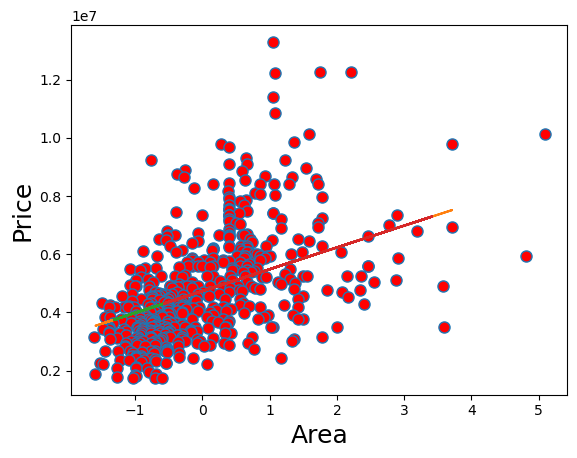

In [193]:
#Частина 3: Візуалізація результатів та порівняння
#9. Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною
#моделлю.

import matplotlib.pyplot as plt

x = x_testus
y = y_testus

#Візуалізація даних за атрибутом area

y_predictive2 = my_model.intercept_ + my_model.coef_[0] * x_testus

#Створюємо графік
plt.plot(df_area, df_price, marker="o", linestyle="", markersize=8, markerfacecolor="r")
plt.plot(x, y_predictive2, linestyle="-")
plt.xlabel("Area", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

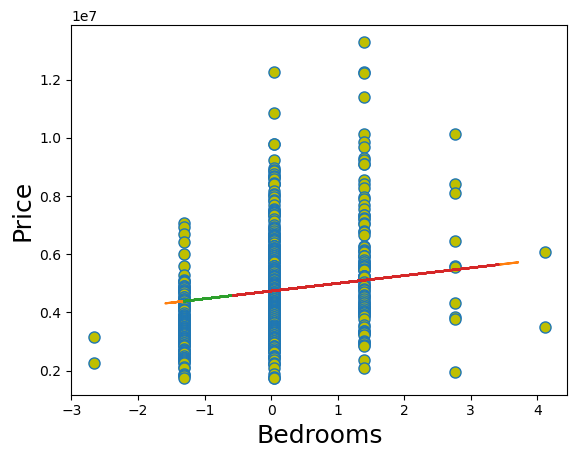

In [194]:
#Візуалізація даних за атрибутом bedrooms

y_predictive3 = my_model.intercept_ + my_model.coef_[1] * x_testus

#Створюємо графік
plt.plot(df_bedrooms, df_price, marker="o", linestyle="", markersize=8, markerfacecolor="y")
plt.plot(x, y_predictive3, linestyle="-")
plt.xlabel("Bedrooms", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

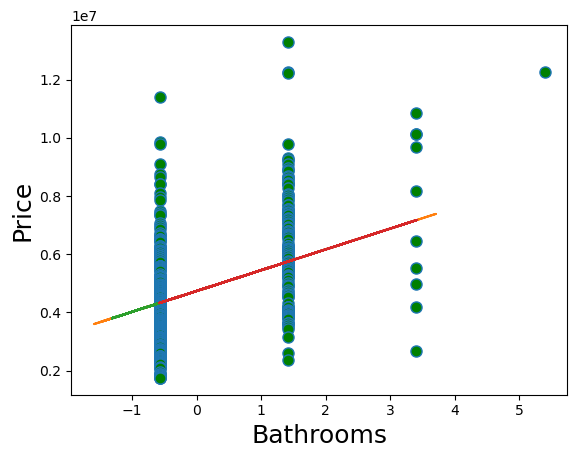

In [195]:
#Візуалізація даних за атрибутом bathrooms

y_predictive4 = my_model.intercept_ + my_model.coef_[2] * x_testus

#Створюємо графік
plt.plot(df_bathrooms, df_price, marker="o", linestyle="", markersize=8, markerfacecolor="g")
plt.plot(x, y_predictive4, linestyle="-")
plt.xlabel("Bathrooms", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

In [196]:
#10. Порівняйте отримані параметри (коефіцієнти) лінійної регресії з аналітичними результатами та оцініть, наскільки схожі вони.

y_predictive5 = my_model.intercept_ + my_model.coef_[0] * df_area + my_model.coef_[1] * df_bedrooms
+ my_model.coef_[2] * df_bathrooms

print(format(df_price.astype(int)) + format(y_predictive5.astype(int)))

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int320      5893080
1      6425098
2      6410367
3      5920717
4      5893080
        ...   
540    3645722
541    3798640
542    3859912
543    3974828
544    4299566
Length: 545, dtype: int32


In [197]:
#11. Зробіть висновки щодо ефективності лінійної регресії у прогнозуванні цін на будинок на основі вказаних атрибутів та
#порівняння з аналітичним рішенням.

#Як можна побачити, ціни на нерухомість, які ми розрахували за рівнянням лінійною регресії, тому для  більш адекватного та
#обгрунтованого аналізу потрібно врахувати додаткові атрибути, які будуть використані для покращення роботи лінійної регресії.

In [198]:
#ВИСНОВКИ

#Отже, у висновку можна сказати, що ми розробили модель лінійної регресії для прогнозування ціни на будинок на основі цих
#атрибутів. За допомогою різних методів ммови Python було розроблена модель лінійної регресії для прогнозування ціни на будинок
#із врахування площі, кількості ванних кіинат та кількості спалень.